In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from IPython.display import display

red_wine = pd.read_csv('csv/red-wine.csv')

# Crear instancias de StandardScaler para normalizar los datos
scaler = StandardScaler()

# Normalizar el conjunto de datos
red_wine_normalized = pd.DataFrame(scaler.fit_transform(red_wine.drop('quality', axis=1)), columns=red_wine.columns[:-1])
red_wine_normalized['quality'] = red_wine['quality']

# Crear conjuntos de entrenamiento y validación
df_train_normalized = red_wine_normalized.sample(frac=0.7, random_state=0)
df_valid_normalized = red_wine_normalized.drop(df_train_normalized.index)
display(df_train_normalized.head(4))

# Separar características y objetivo
X_train_normalized = df_train_normalized.drop('quality', axis=1)
X_valid_normalized = df_valid_normalized.drop('quality', axis=1)
y_train_normalized = df_train_normalized['quality']
y_valid_normalized = df_valid_normalized['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,1.425044,-0.323013,0.816598,-0.311323,1.775397,1.063900,0.593954,0.770280,-0.914312,0.601055,0.353895,6
1032,-0.126188,1.632254,-1.391472,1.107633,0.160114,-1.039977,-0.987312,0.950485,0.316751,-0.756246,-0.772512,5
1002,0.448342,-1.328579,0.303093,-0.346797,-0.520005,-0.274931,-0.591995,-0.840962,-0.331177,1.073160,1.198701,7
487,1.080326,0.654620,0.457144,-0.524166,-0.732542,-1.039977,-0.987312,0.770280,-0.914312,-1.405390,-0.397043,6


In [13]:
print(X_train_normalized.shape)

(1119, 11)


In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model_normalized = keras.Sequential([
    layers.Dense(120, activation='relu', input_shape=[11]),
    layers.Dense(1),
])

In [15]:
model_normalized.compile(
    optimizer='adam',
    loss='mae',
)

In [16]:
history_normalized = model_normalized.fit(
    X_train_normalized, y_train_normalized,
    validation_data=(X_valid_normalized, y_valid_normalized),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 0s 26ms/step - loss: 5.6210 - val_loss: 5.5553
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 5.4071 - val_loss: 5.3335
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 5.1922 - val_loss: 5.1109
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 4.9750 - val_loss: 4.8864
Epoch 5/10
5/5 [==============================] - 0s 10ms/step - loss: 4.7583 - val_loss: 4.6570
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 4.5373 - val_loss: 4.4243
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 4.3098 - val_loss: 4.1888
Epoch 8/10
5/5 [==============================] - 0s 7ms/step - loss: 4.0781 - val_loss: 3.9488
Epoch 9/10
5/5 [==============================] - 0s 8ms/step - loss: 3.8413 - val_loss: 3.7089
Epoch 10/10
5/5 [==============================] - 0s 7ms/step - loss: 3.5997 - val_loss: 3.4733


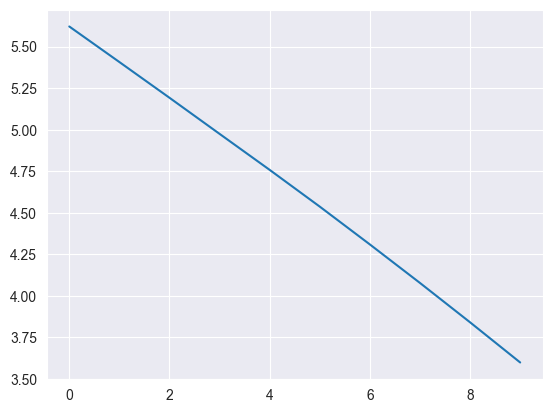

In [17]:
import pandas as pd

# convertir el historial de entrenamiento a un DataFrame
history_df_normalized = pd.DataFrame(history_normalized.history)
# utilizar el método de trazado nativo de Pandas
history_df_normalized['loss'].plot();

In [18]:
eval_result_normalized = model_normalized.evaluate(X_valid_normalized, y_valid_normalized)
print(f"Loss en datos de validación: {eval_result_normalized}")

15/15 [==============================] - 0s 852us/step - loss: 3.4733
Loss en datos de validación: 3.4732630252838135


15/15 [==============================] - 0s 793us/step


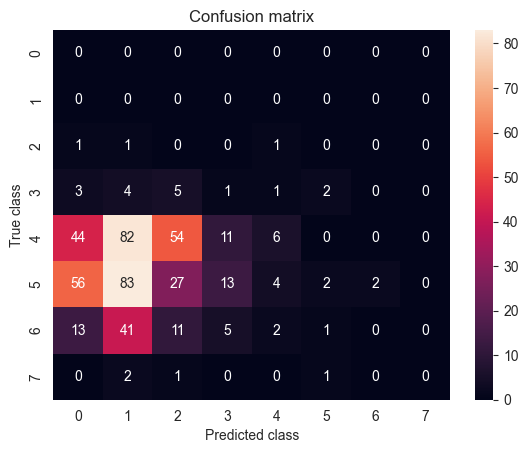

In [19]:
# Ver matriz de confusión
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model_normalized.predict(X_valid_normalized)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_valid_normalized, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()